<a href="https://colab.research.google.com/github/Imthiyas1989/Car-Price-Prediction-Challenge/blob/main/Final_project_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

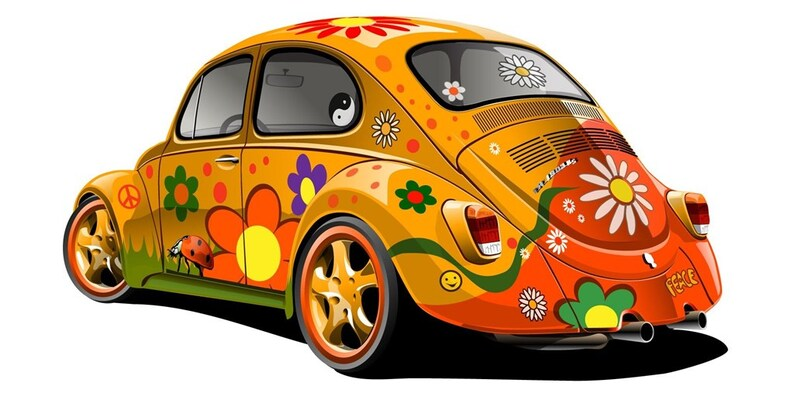

#1. EDA

In [ ]:
#libraries for data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"


In [ ]:
import pandas as pd

data = 'https://raw.githubusercontent.com/Imthiyas1989/Car-Price-Prediction-Challenge/refs/heads/main/car_price_prediction.csv'
df = pd.read_csv(data)
df.head() # first 5 rows of the dataset

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.shape

(19237, 18)

In [ ]:
df.describe() # statistical summary of the dataset

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
df.describe(include='object') # statistical summary of the dataset

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [ ]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [ ]:
df.isnull().sum() # missing values

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
df.nunique() # unique values

,0
ID,18924
Price,2315
Levy,559
Manufacturer,65
Model,1590
Prod. year,54
Category,11
Leather interior,2
Fuel type,7
Engine volume,107


In [ ]:
df.duplicated().sum() # duplicated values

313

#2. Data Cleaning & Preprocessing

In [ ]:
df = df.drop_duplicates() # removing duplicates

In [ ]:
# ID column is unique value and does not require for model
df.drop(columns=['ID'], inplace=True)

In [ ]:
# Levy column should be int not object
print(df['Levy'].unique())

['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051' '790' '1292' '1047' '528' '1211' '1493' '1793'
 '574' '930' '1998' '271' '706' '1481' '1677' '1661' '1286' '1408' '1090'
 '595' '1451' '1267' '993' '1714' '878' '641' '749' '1511' '603' '353'
 '877' '1236' '1141' '397' '784' '1024' '1357' '1301' '

In [ ]:
# can see levy column has - in the thrid rown so we need to replace the non numerical value to NaN before converting
df.loc[:,'Levy'] = pd.to_numeric(df['Levy'], errors='coerce')
df['Levy']

,Levy
0,1399.0
1,1018.0
2,NaN
3,862.0
4,446.0
...,...
19232,NaN
19233,831.0
19234,836.0
19235,1288.0


In [ ]:
# Cyclinder column should be int from float
df.loc[:,'Cylinders'] = df['Cylinders'].astype(int)
df['Cylinders']

,Cylinders
0,6.0
1,6.0
2,4.0
3,4.0
4,4.0
...,...
19232,4.0
19233,4.0
19234,4.0
19235,4.0


In [ ]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [ ]:
# Removing Turbo and convert to float
df.loc[:,'Engine volume'] = df['Engine volume'].astype(str).str.replace(' Turbo', '', regex=False).astype(float)
print(df['Engine volume'])

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 18924, dtype: object


In [ ]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [ ]:
# First we need to reemove non-numeric values and then convert to int from object
df['Mileage'] = df['Mileage'].str.replace(' km', '').str.replace(',', '')
df['Mileage']= df['Mileage'] .astype(int)
df['Mileage']

,Mileage
0,186005
1,192000
2,200000
3,168966
4,91901
...,...
19232,300000
19233,161600
19234,116365
19235,51258


In [ ]:
df.duplicated().sum() # Again checking for duplicate values after converting datatypes and replacing non numerical values

3199

In [ ]:
df.drop_duplicates(inplace=True) # now removing duplicate values
# No of rows after removing duplicates
df.shape[0]

15725

In [ ]:
df.isnull().sum() # Now checking for null values after converting datatypes and replacing non numerical values

,0
Price,0
Levy,5684
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0
Mileage,0


In [ ]:
# now we need to replace Null values in Levy column with the mean on the same column
df['Levy'] = df['Levy'].fillna(df['Levy'].mean()).astype(int)

In [ ]:
df.isnull().sum() # Now it done as there are no null values

,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0
Mileage,0


In [ ]:
# checking first few rows after cleaning the data
df.head(2)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


#Outliers

In [ ]:
# First we need to find the Outliers by visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Finding outliers using IQR
df_numerical_columns = df[['Levy', 'Airbags', 'Mileage', 'Engine volume', 'Cylinders']]
df_numerical_columns

,Levy,Airbags,Mileage,Engine volume,Cylinders
0,1399,12,186005,3.5,6.0
1,1018,8,192000,3.0,6.0
2,879,2,200000,1.3,4.0
3,862,0,168966,2.5,4.0
4,446,4,91901,1.3,4.0
...,...,...,...,...,...
19230,645,12,307325,1.8,4.0
19232,879,5,300000,2.0,4.0
19233,831,8,161600,2.4,4.0
19234,836,4,116365,2.0,4.0


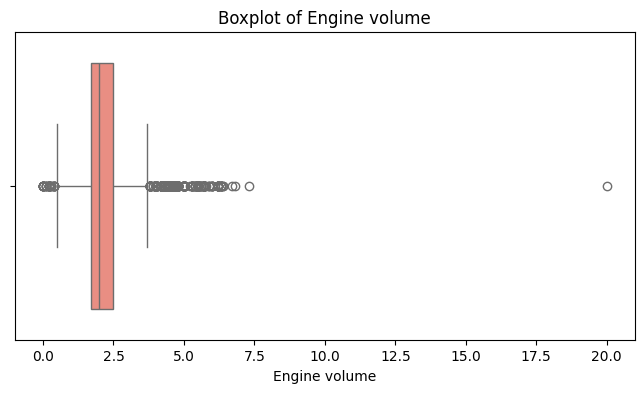

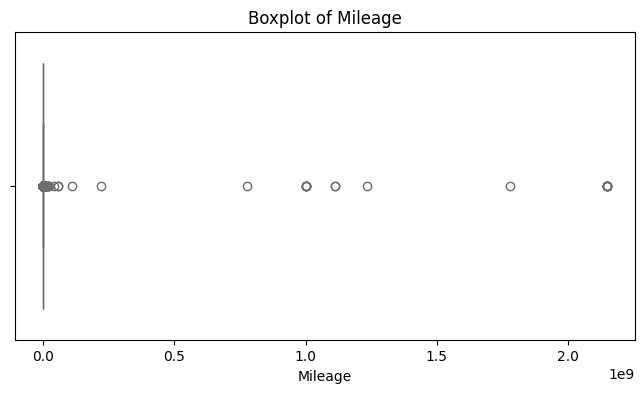

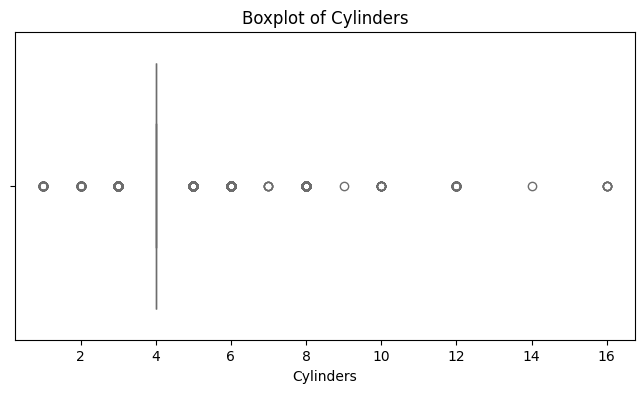

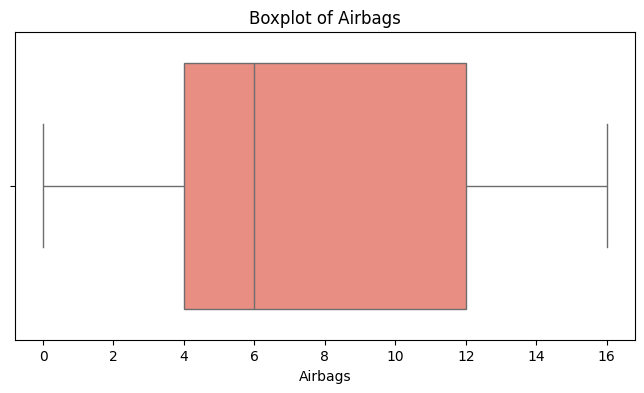

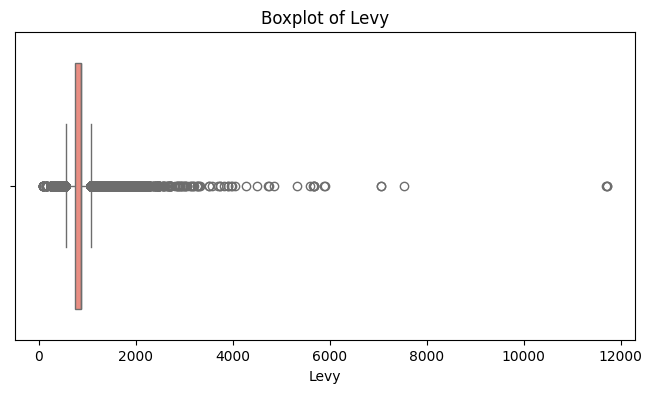

In [ ]:
# Using box plots for key numerical columns to visualize outliers
numerical_columns = ['Engine volume', 'Mileage', 'Cylinders', 'Airbags', 'Levy']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# creating a empty list to store outlier columns
outlier_cols = []

for column in df_numerical_columns.columns:
    # Calculate the IQR (Interquartile Range)
    Q1 = df_numerical_columns[column].quantile(0.25)
    Q3 = df_numerical_columns[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers based on the IQR
    outliers = (df_numerical_columns[column] < Q1 - 1.5 * IQR) | (df_numerical_columns[column] > Q3 + 1.5 * IQR)

    # Check if there are any outliers in the column
    if any(outliers):
        outlier_cols.append(column)

# Print columns with outliers
print(outlier_cols)

['Levy', 'Mileage', 'Engine volume', 'Cylinders']


In [ ]:
df.info(2)

<class 'pandas.core.frame.DataFrame'>
Index: 15725 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15725 non-null  int64  
 1   Levy              15725 non-null  int64  
 2   Manufacturer      15725 non-null  object 
 3   Model             15725 non-null  object 
 4   Prod. year        15725 non-null  int64  
 5   Category          15725 non-null  object 
 6   Leather interior  15725 non-null  object 
 7   Fuel type         15725 non-null  object 
 8   Engine volume     15725 non-null  object 
 9   Mileage           15725 non-null  int64  
 10  Cylinders         15725 non-null  float64
 11  Gear box type     15725 non-null  object 
 12  Drive wheels      15725 non-null  object 
 13  Doors             15725 non-null  object 
 14  Wheel             15725 non-null  object 
 15  Color             15725 non-null  object 
 16  Airbags           15725 non-null  int64  
dty

In [ ]:
df.describe().round(2)

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags
count,15725.00,15725.00,15725.00,1.572500e+04,15725.00,15725.00
mean,20279.44,879.28,2010.52,1.836421e+06,4.48,6.54
std,210639.02,366.59,6.01,5.353248e+07,1.13,4.07
min,1.00,87.00,1939.00,0.000000e+00,1.00,0.00
25%,7527.00,746.00,2008.00,6.657500e+04,4.00,4.00
50%,14166.00,879.00,2012.00,1.210000e+05,4.00,6.00
75%,23364.00,879.00,2014.00,1.800000e+05,4.00,12.00
max,26307500.00,11714.00,2020.00,2.147484e+09,16.00,16.00


In [ ]:
# replacing outlier with median using the below function
def replace_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Modify the original DataFrame using .loc to avoid SettingWithCopyWarning. we are using because pandas does not know whether it is view or copy of the dataframe.
    median_value = df[col].median()
    df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = median_value

# Finally, loop through the numerical columns and replace outliers
for col in ['Levy', 'Engine volume', 'Mileage', 'Cylinders']:
    replace_outliers(df_numerical_columns, col)


#3. Visualization

In [ ]:
df['Price'].mean()

20279.439364069953

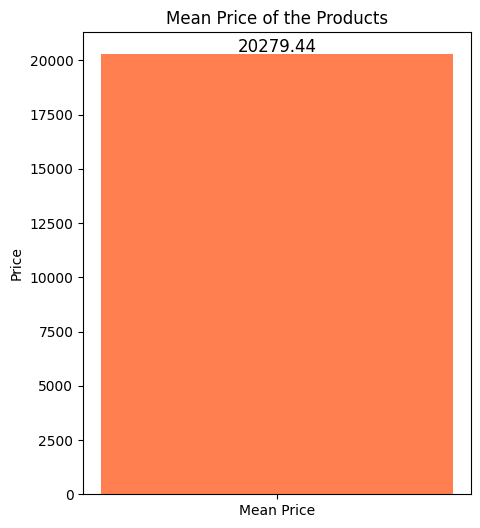

In [ ]:
# mean of the Price column
mean_price = df['Price'].mean()
plt.figure(figsize=(5, 6))
plt.bar(['Mean Price'], [mean_price], color='coral')
plt.text(0, mean_price + 100, f'{mean_price:.2f}', ha='center', fontsize=12, color='black')
plt.ylabel('Price')
plt.title('Mean Price of the Products')
plt.show()


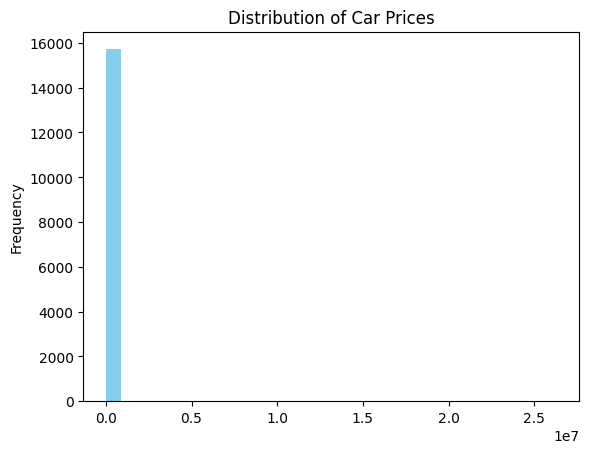

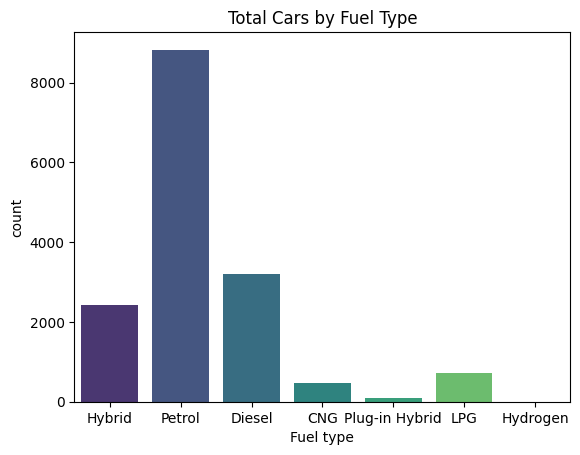

In [ ]:
# Distribution of Car Prices
df['Price'].plot(kind='hist', bins=30, color='skyblue', title='Distribution of Car Prices')
plt.show()

# Countplot for categorical features
sns.countplot(x='Fuel type', hue='Fuel type', data=df, palette='viridis', dodge=False, legend=False)
plt.title('Total Cars by Fuel Type')
plt.show()


In [ ]:
# Mean of car price by Year
average_prices = df.groupby('Prod. year')['Price'].mean().reset_index()
average_prices[:10]

,Prod. year,Price
0,1939,171.333333
1,1943,119172.000000
2,1947,150.000000
3,1953,17735.250000
4,1957,7527.000000
5,1964,6585.500000
6,1965,65074.000000
7,1968,2200.000000
8,1973,15681.000000
9,1974,2437.000000


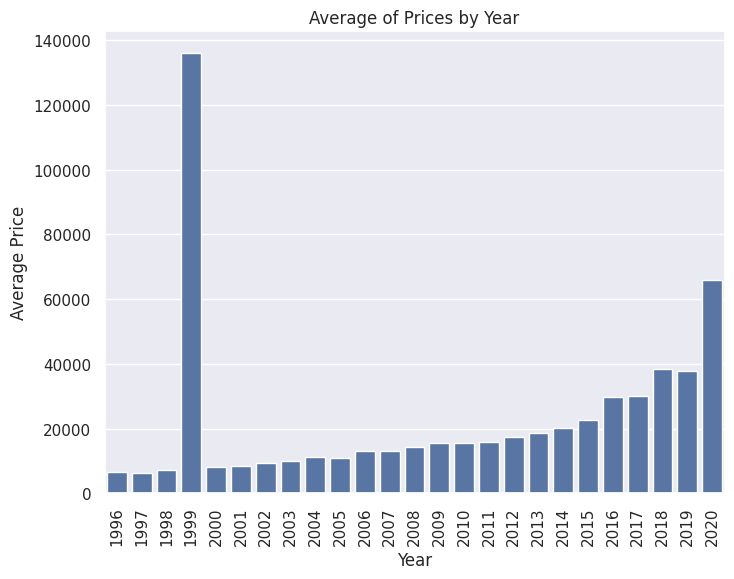

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Prod. year', y='Price', data=average_prices.tail(25))
plt.title('Average of Prices by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# the year associated with the low and high values in the 'Price' column
min_year = average_prices.loc[average_prices['Price'].idxmin(), 'Prod. year']
max_year = average_prices.loc[average_prices['Price'].idxmax(), 'Prod. year']
min_price = average_prices['Price'].min()
max_price = average_prices['Price'].max()
print(f"Low Price is: {min_price} in : {min_year}")
print(f"High Price is: {max_price} in : {max_year}")

Low Price is: 150.0 in : 1947
High Price is: 135935.48780487804 in : 1999


In [ ]:
# Distribution of Car Categories
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
print(category_counts)

       Category  Count
0         Sedan   7010
1          Jeep   4225
2     Hatchback   2548
3       Minivan    534
4         Coupe    476
5     Universal    311
6      Microbus    295
7   Goods wagon    229
8        Pickup     51
9     Cabriolet     35
10    Limousine     11


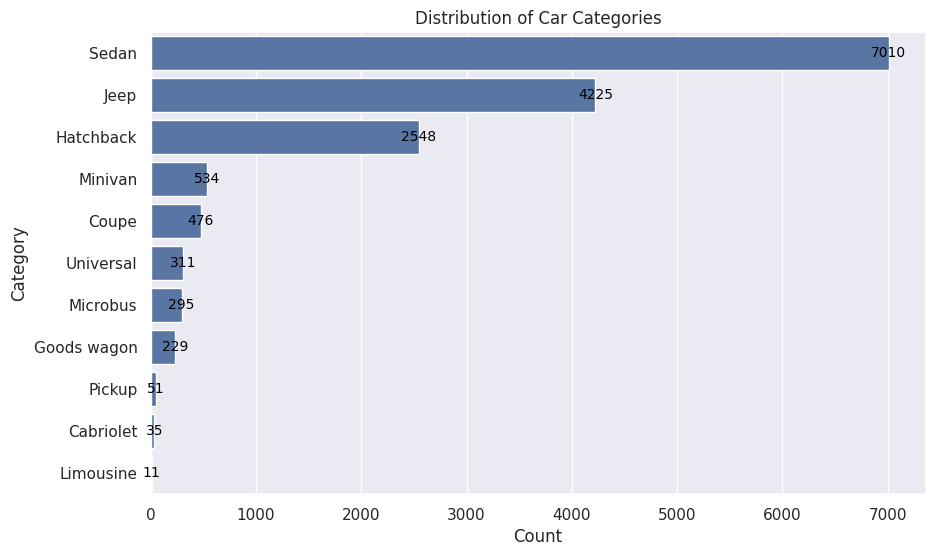

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Count', y='Category', data=category_counts)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of Car Categories')
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='center', va='center', fontsize=10, color='black')
plt.show()

In [ ]:
# Corrletion Between Doors and Price
df['Doors'].value_counts()

,count
Doors,
04-May,14855
02-Mar,746
>5,124


In [ ]:
# Now mapping categorical values to numerical values
door_mapping = {'02-Mar': 2, '04-May': 4, '>5': 5}
df['Doors'] = df['Doors'].map({'02-Mar': 2, '04-May': 4, '>5': 5})

# Next finding the correlation coefficient
corr = df['Doors'].corr(df['Price'])
print("Correlation is: {:.3f}".format(corr))

Correlation is: -0.033


-0.033" refers to a weak negative correlation

In [ ]:
# Relation between Engine volume and Cylinders
# Correlation coefficient for Engine volume and Cylinders
corr = df['Engine volume'].corr(df['Cylinders'])
print("Correlation is: {:.3f}".format(corr))

Correlation is: 0.732


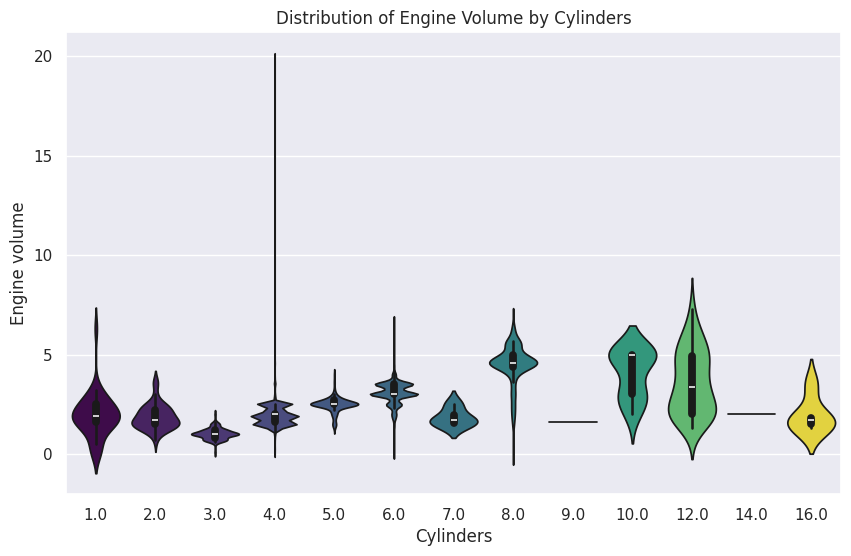

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Cylinders'], y=df['Engine volume'], hue=df['Cylinders'], palette='viridis', legend=False)
plt.title('Distribution of Engine Volume by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Engine volume')
plt.show()

In [ ]:
# Distribution of Gearbox Types
gearbox_count=df['Gear box type'].value_counts()
gearbox_count

,count
Gear box type,
Automatic,10088
Tiptronic,3064
Manual,1841
Variator,732


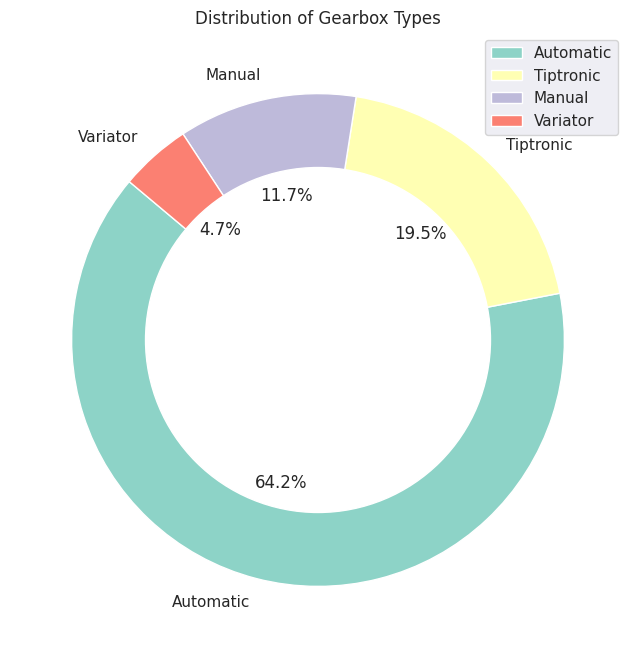

In [ ]:
# Distribution of Gearbox Types in percentage
plt.figure(figsize=(8, 8))
plt.pie(gearbox_count, labels=gearbox_count.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend()
plt.title('Distribution of Gearbox Types')
plt.show()

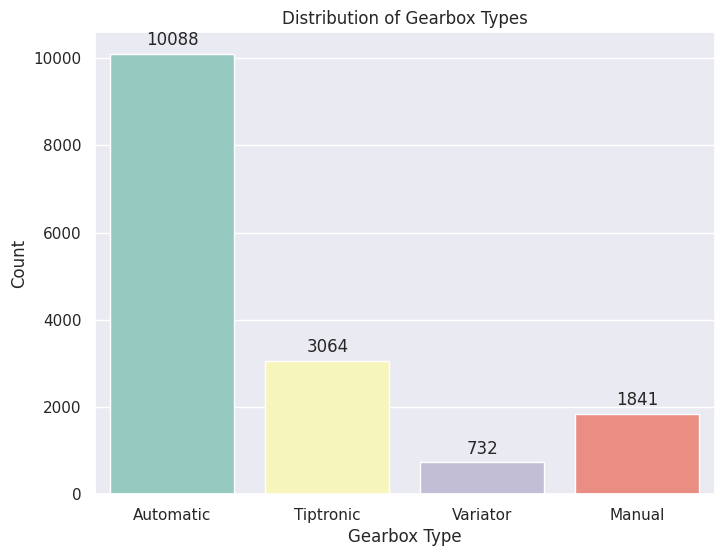

In [ ]:
# Distribution of Gearbox Types in count
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Gear box type', data=df, hue = 'Gear box type', palette='Set3', legend=False)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xlabel('Gearbox Type')
plt.ylabel('Count')
plt.title('Distribution of Gearbox Types')
plt.show()

In [ ]:
# Total count of wheel location
df['Wheel'].value_counts()

,count
Wheel,
Left wheel,14293
Right-hand drive,1432


In [ ]:
# Distribution of Leather Interior
leather_count = df['Leather interior'].value_counts()
leather_count

,count
Leather interior,
Yes,10558
No,5167


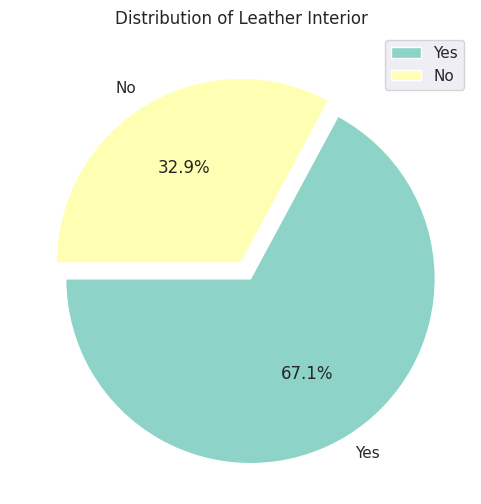

In [ ]:
# Distribution of Leather Interior in percent
plt.figure(figsize=(6, 6))
explode = (0.1, 0)
plt.pie(leather_count, labels=leather_count.index, autopct='%1.1f%%', startangle=180, colors=plt.cm.Set3.colors, explode=explode)

plt.legend()
plt.title('Distribution of Leather Interior')

plt.show()

In [ ]:
# Distribution of Vehicles by Fuel Type and Category
df['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

In [ ]:
df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

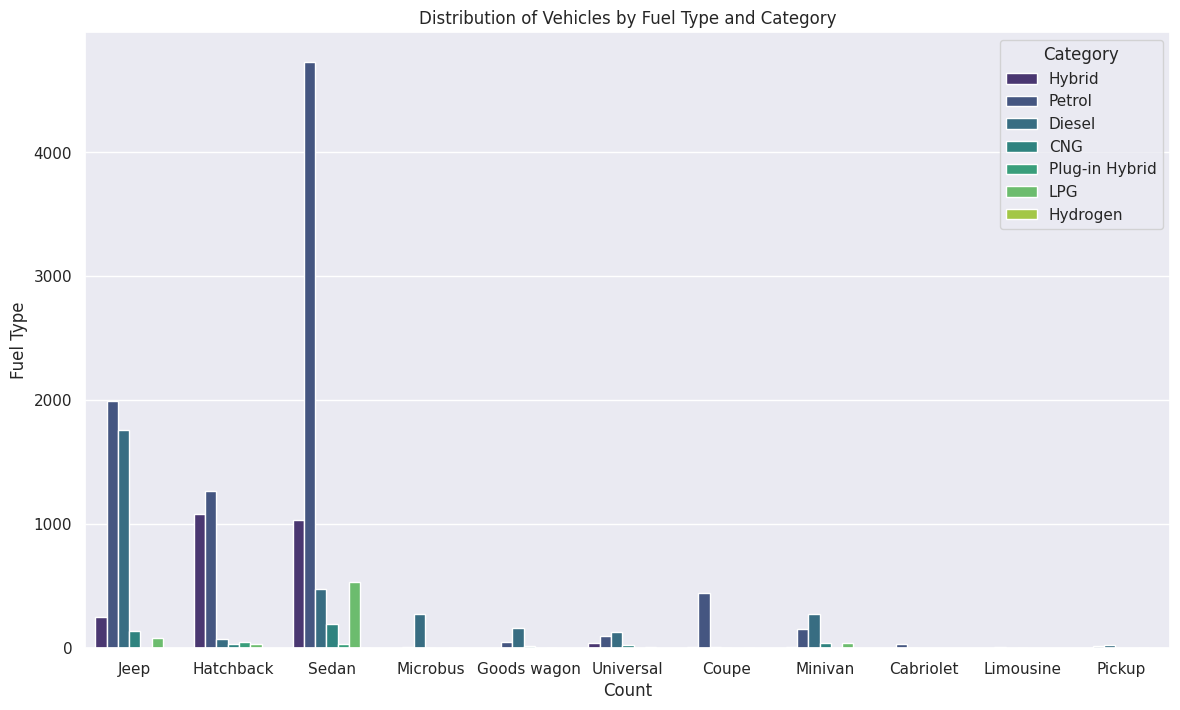

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Category', hue='Fuel type', data=df, palette='viridis')
plt.ylabel('Fuel Type')
plt.xlabel('Count')
plt.title('Distribution of Vehicles by Fuel Type and Category')
plt.legend(title='Category')
plt.show()

In [ ]:
# Top 5 Manufacturer
top_Manufacturer = df['Manufacturer'].value_counts().head(5)
top_Manufacturer

,count
Manufacturer,
HYUNDAI,3050
TOYOTA,2863
MERCEDES-BENZ,1451
CHEVROLET,968
FORD,956


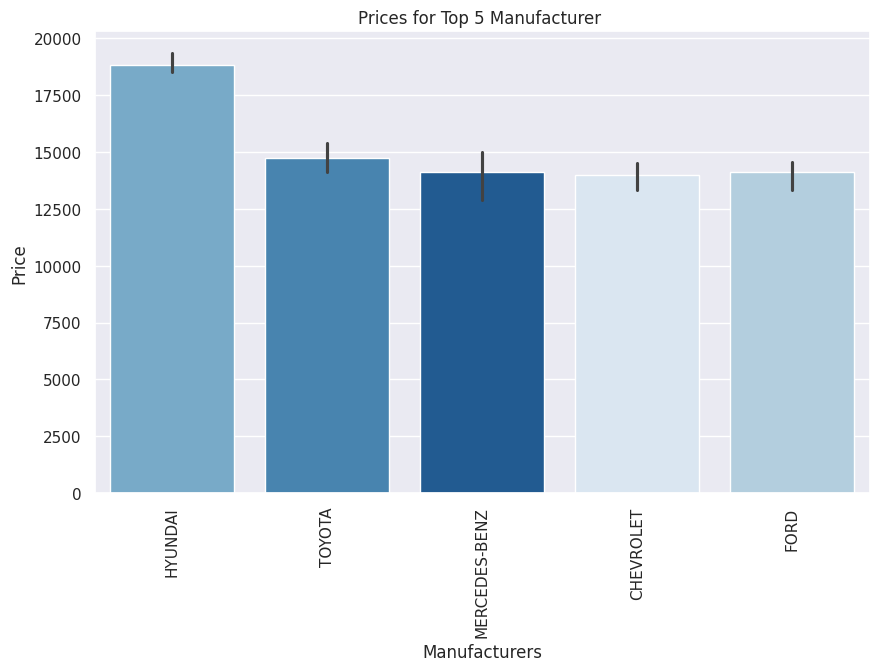

In [ ]:
top_manufacturers = df['Manufacturer'].value_counts().nlargest(5).index
plt.figure(figsize=(10, 6))
sns.barplot(x='Manufacturer', y='Price', data=df[df['Manufacturer'].isin(top_manufacturers)],
            estimator='median', order=top_manufacturers, hue = 'Manufacturer', palette="Blues", legend=False)
plt.xticks(rotation=90)
plt.title('Prices for Top 5 Manufacturer ') #median price
plt.xlabel('Manufacturers')
plt.ylabel('Price')
plt.show()

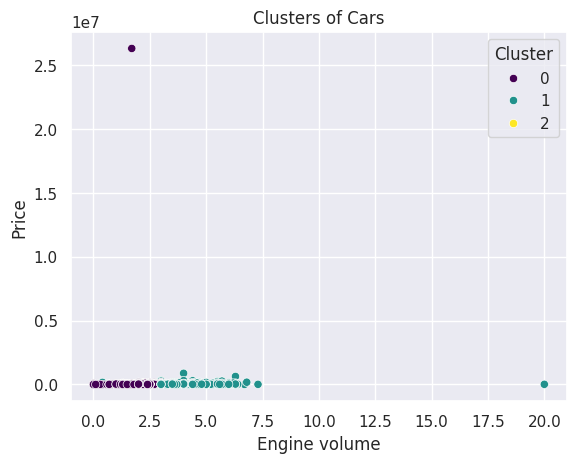

In [ ]:
# Clustering - Multivariate. Using K-means to find clusters of similar cars based on multiple features
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Plot clusters
sns.scatterplot(x='Engine volume', y='Price', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Cars')
plt.show()

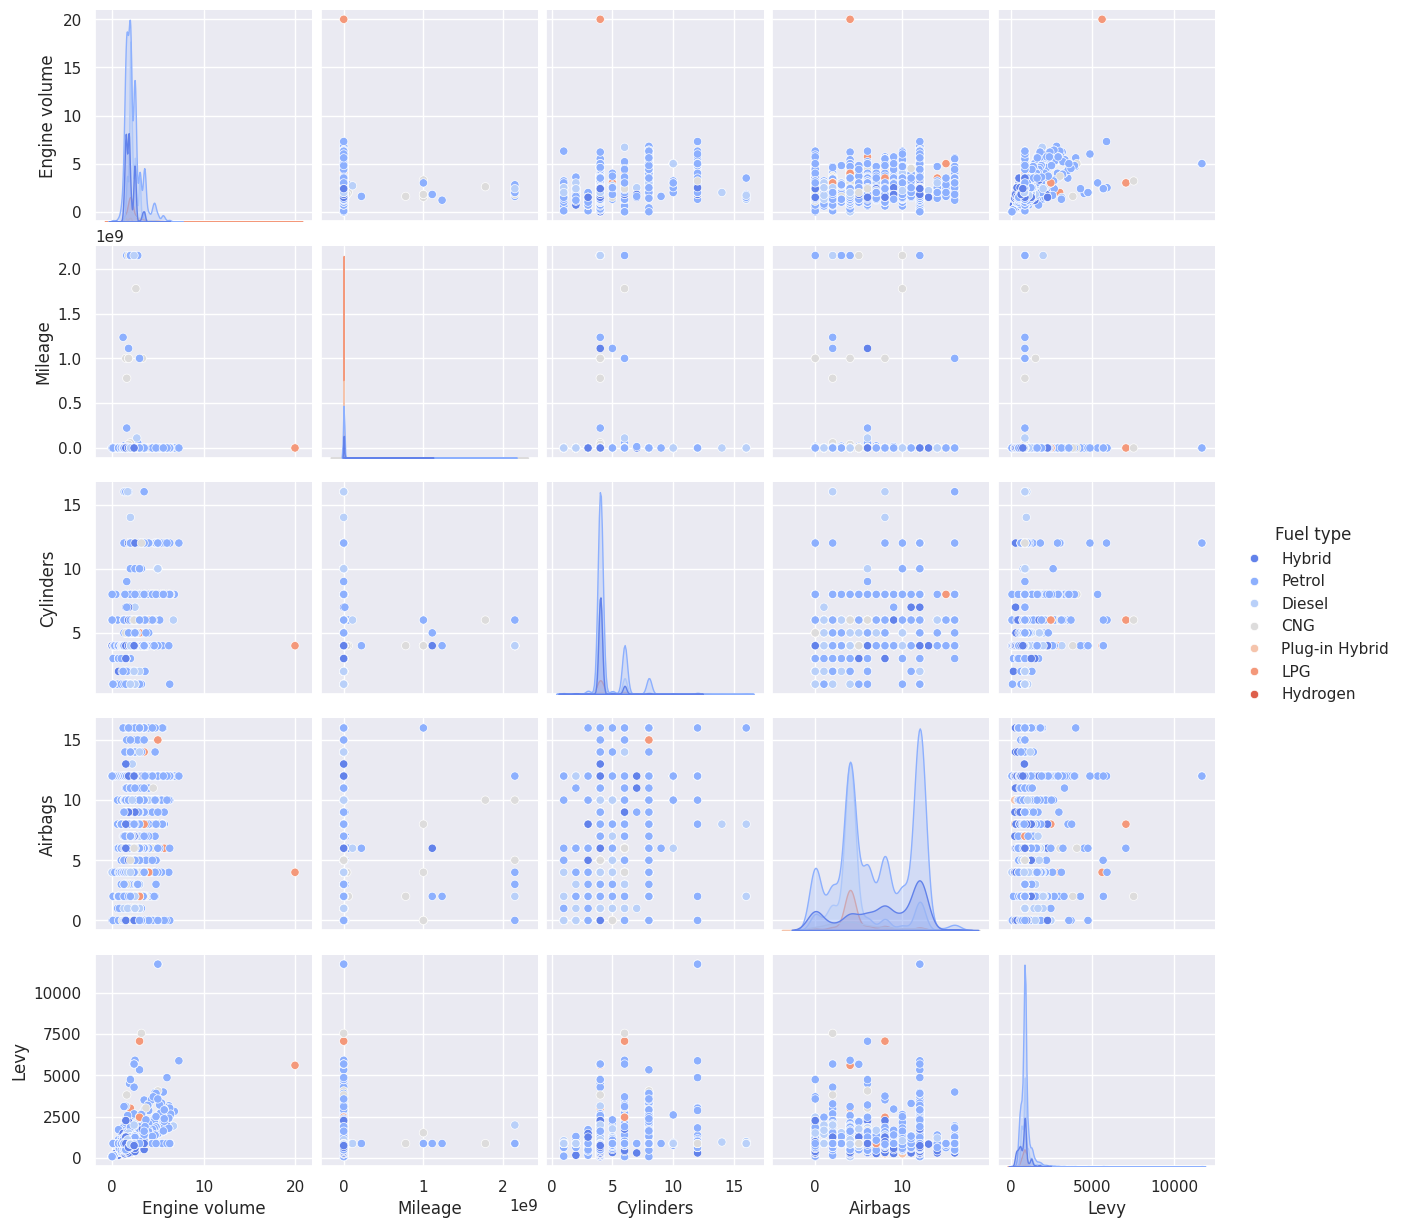

In [ ]:
# Pairplot with Hue. Multivariate analysis. To know how variables interact in different fuel types.
sns.pairplot(df, vars=numerical_columns, hue='Fuel type', palette='coolwarm')
plt.show()

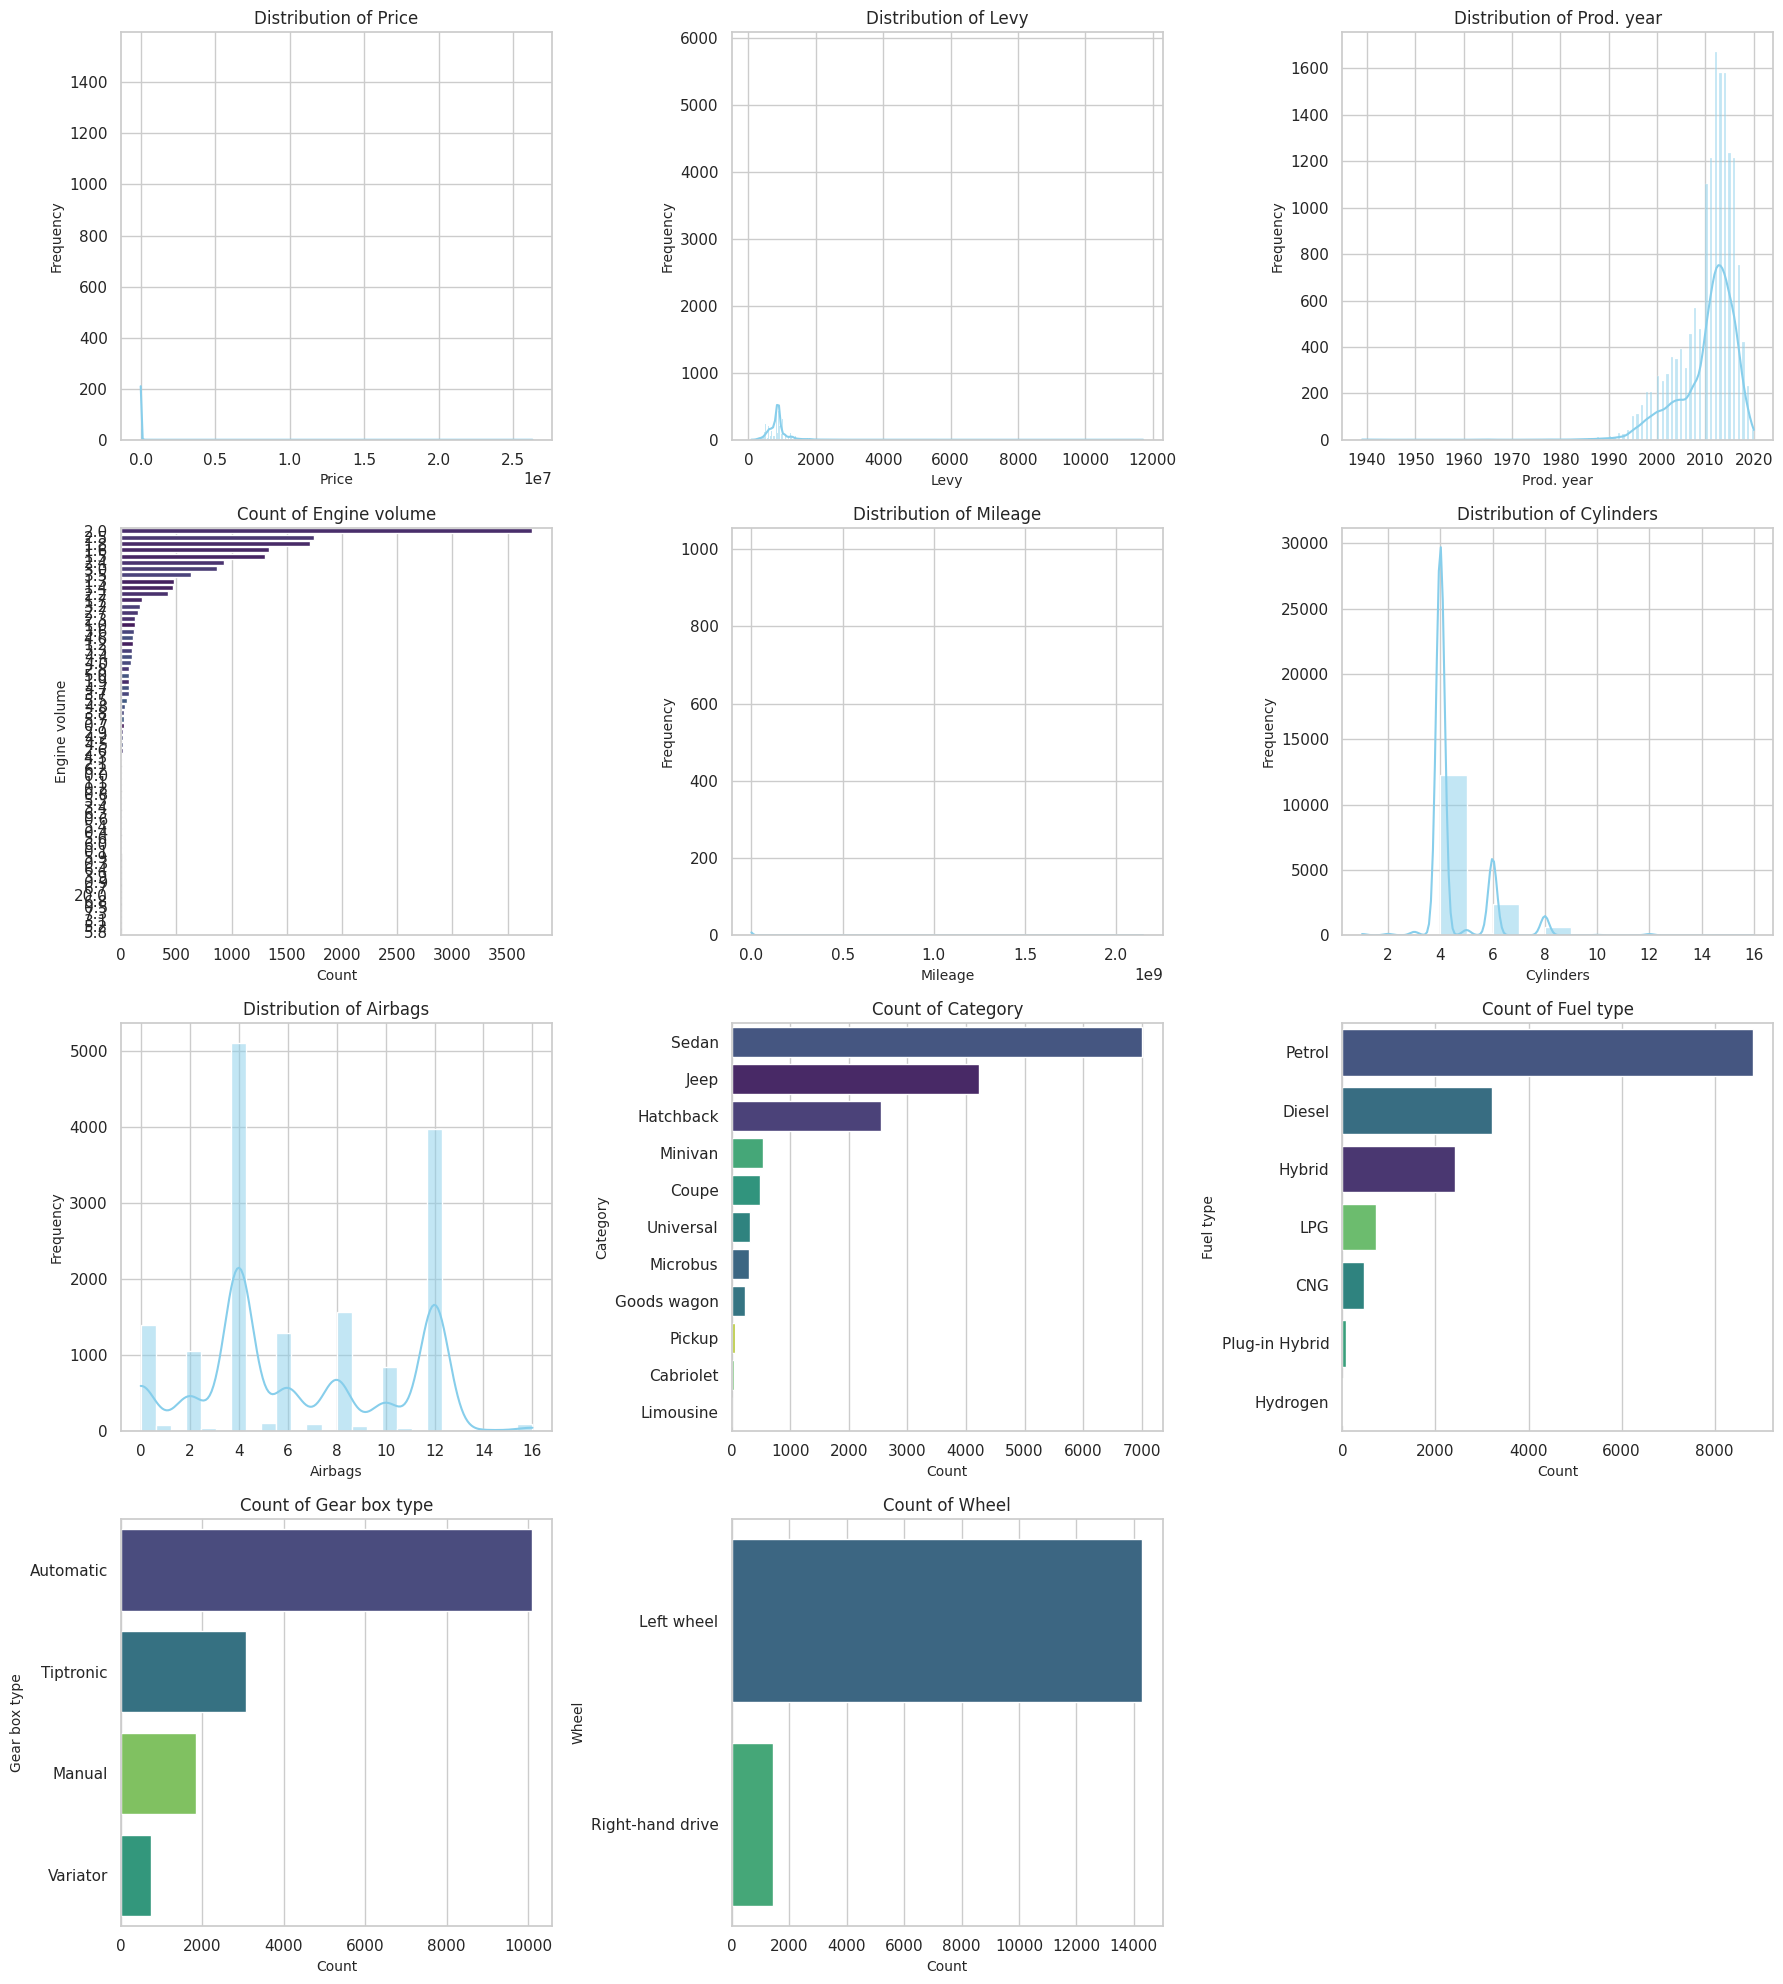

In [ ]:
# Univariate analysis
import math

sns.set_style('whitegrid')

def univariate_analysis_grid(df, columns):
    num_columns = 3
    num_plots = len(columns)
    num_rows = math.ceil(num_plots / num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 5))
    axes = axes.flatten()

    for idx, column in enumerate(columns):
        ax = axes[idx]
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], ax=ax, kde=True, color='skyblue')
            ax.set_title(f'Distribution of {column}', fontsize=12)
            ax.set_xlabel(column, fontsize=10)
            ax.set_ylabel('Frequency', fontsize=10)
        else:
            sns.countplot(y=df[column], ax=ax, hue = df[column], palette='viridis', legend=False, order=df[column].value_counts().index)
            ax.set_title(f'Count of {column}', fontsize=12)
            ax.set_xlabel('Count', fontsize=10)
            ax.set_ylabel(column, fontsize=10)

    for i in range(num_plots, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

columns = [
    'Price', 'Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags',
    'Category', 'Fuel type', 'Gear box type', 'Wheel'
]
univariate_analysis_grid(df, columns)


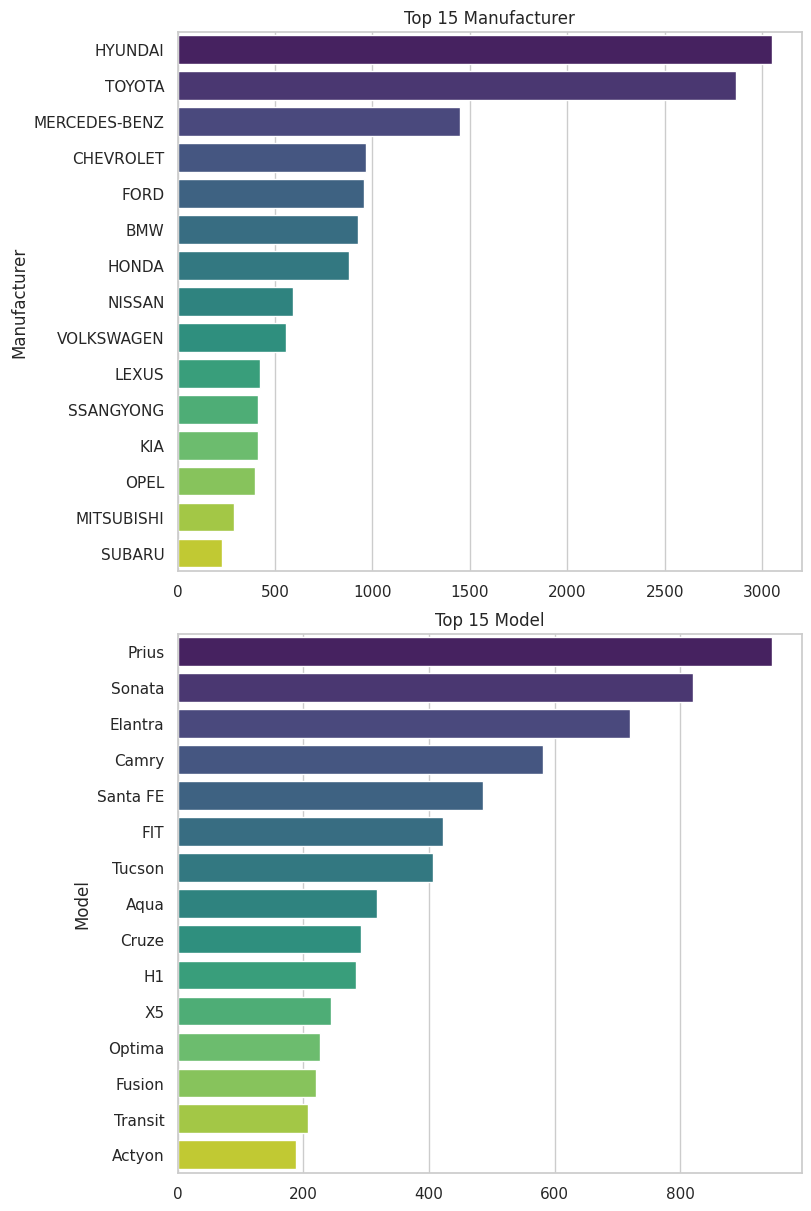

In [ ]:
columns_to_limit = ['Manufacturer', 'Model']
top_n = 15
num_columns = len(columns_to_limit)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(8, 6 * num_columns), constrained_layout=True)
if num_columns == 1:
    axes = [axes]
for idx, column in enumerate(columns_to_limit):
    ax = axes[idx]
    if column in columns_to_limit:
        sns.barplot(
            x=df[column].value_counts().head(top_n).values,
            y=df[column].value_counts().head(top_n).index,
            ax=ax,
            hue=df[column].value_counts().head(top_n).index,
            palette='viridis',
            legend=False
        )
        ax.set_title(f'Top {top_n} {column}', fontsize=12)
    else:
        sns.countplot(
            y=df[column],
            ax=ax,
            hue=None,
            palette='viridis',
            order=df[column].value_counts().index
        )
        ax.set_title(f'Count of {column}', fontsize=12)

plt.show()


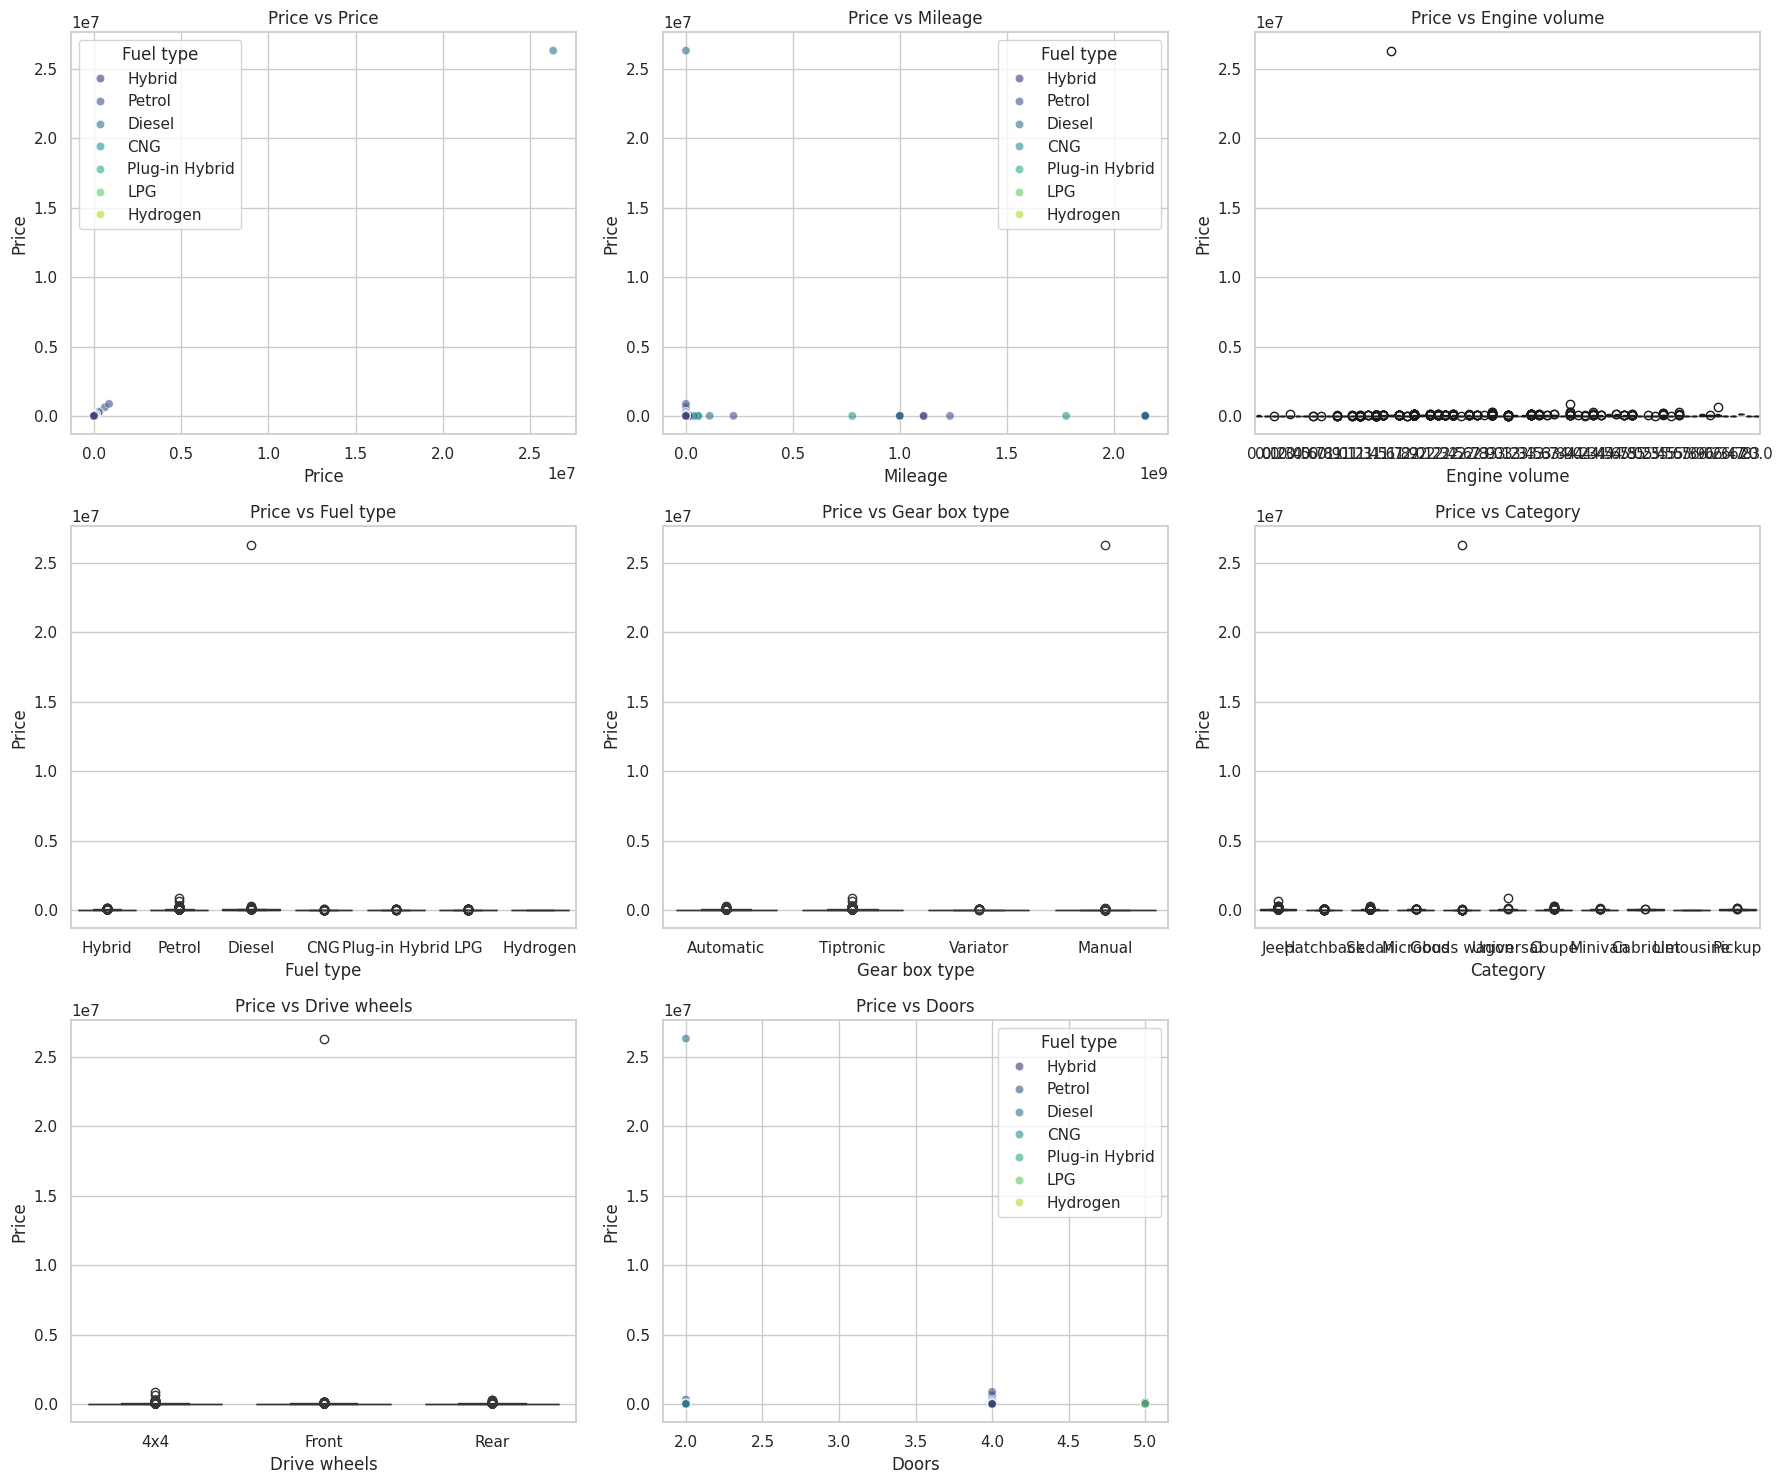

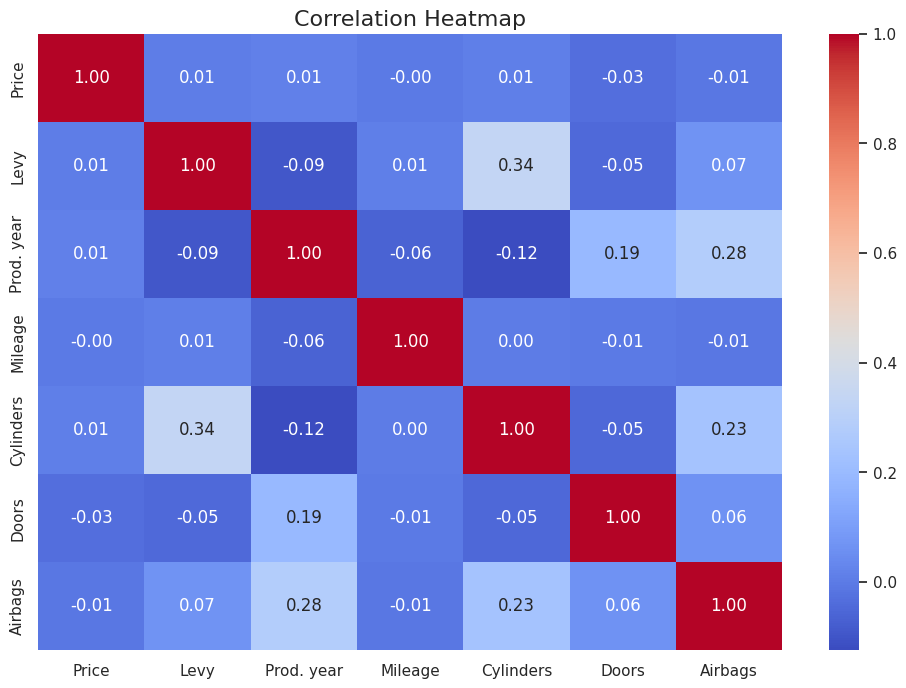

In [ ]:
# Bivariate analysis
# Specifying the columns for bivariate analysis
columns_to_analyze = ['Price', 'Mileage', 'Engine volume', 'Fuel type',
                      'Gear box type', 'Category', 'Drive wheels', 'Doors']
n_cols = 3  # Number of plots per row
n_rows = (len(columns_to_analyze) + n_cols - 1) // n_cols  # Calculating rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten() # Flattening axes for easier indexing
for idx, column in enumerate(columns_to_analyze):
    ax = axes[idx]
    if pd.api.types.is_numeric_dtype(df[column]):
        # Scatter plot for numerical columns vs Price
        sns.scatterplot(x=df[column], y=df['Price'], ax=ax, hue=df['Fuel type'], palette='viridis', alpha=0.6)
        ax.set_title(f'Price vs {column}', fontsize=12)
    else:
        # Box plot for categorical columns vs Price
        sns.boxplot(x=df[column], y=df['Price'], ax=ax, hue=df[column], palette='viridis', legend=False)
        ax.set_title(f'Price vs {column}', fontsize=12)

# Removing extra subplots if any
for idx in range(len(columns_to_analyze), len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()

# Plot heatmap for all numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


#Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identifying categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print("Dataset after Label Encoding:")
print(df.head())

Dataset after Label Encoding:
   Price  Levy  Manufacturer  Model  Prod. year  Category  Leather interior  \
0  13328  1399            32   1242        2010         4                 1   
1  16621  1018             8    658        2011         4                 0   
2   8467   879            21    684        2006         3                 0   
3   3607   862            16    661        2011         4                 1   
4  11726   446            21    684        2014         3                 1   

   Fuel type  Engine volume  Mileage  Cylinders  Gear box type  Drive wheels  \
0          2             35   186005        6.0              0             0   
1          5             30   192000        6.0              2             0   
2          5             13   200000        4.0              3             1   
3          2             25   168966        4.0              0             0   
4          5             13    91901        4.0              0             1   

   Doors  Whee

In [ ]:
# To confirm the numerical features are on the same scale, using StandardScaler
numerical_columns = ['Levy', 'Prod. year', 'Mileage', 'Cylinders', 'Airbags']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print(df.head())

   Price      Levy  Manufacturer  Model  Prod. year  Category  \
0  13328  1.417748            32   1242   -0.086315         4   
1  16621  0.378413             8    658    0.080021         4   
2   8467 -0.000767            21    684   -0.751658         3   
3   3607 -0.047141            16    661    0.080021         4   
4  11726 -1.181953            21    684    0.579029         3   

   Leather interior  Fuel type  Engine volume   Mileage  Cylinders  \
0                 1          2             35 -0.030831   1.336741   
1                 0          5             30 -0.030719   1.336741   
2                 0          5             13 -0.030570  -0.426259   
3                 1          2             25 -0.031149  -0.426259   
4                 1          5             13 -0.032589  -0.426259   

   Gear box type  Drive wheels  Doors  Wheel  Color   Airbags  Cluster  
0              0             0      4      0     12  1.341495        1  
1              2             0      4     

Correlation of Features with Price:
 Price               1.000000
Prod. year          0.014836
Engine volume       0.014057
Gear box type       0.011219
Cylinders           0.010546
Cluster             0.008892
Levy                0.006216
Leather interior    0.005972
Model              -0.000016
Manufacturer       -0.001663
Mileage            -0.002011
Drive wheels       -0.006350
Airbags            -0.010791
Color              -0.012122
Wheel              -0.016957
Fuel type          -0.017402
Category           -0.019942
Doors              -0.032560
Name: Price, dtype: float64


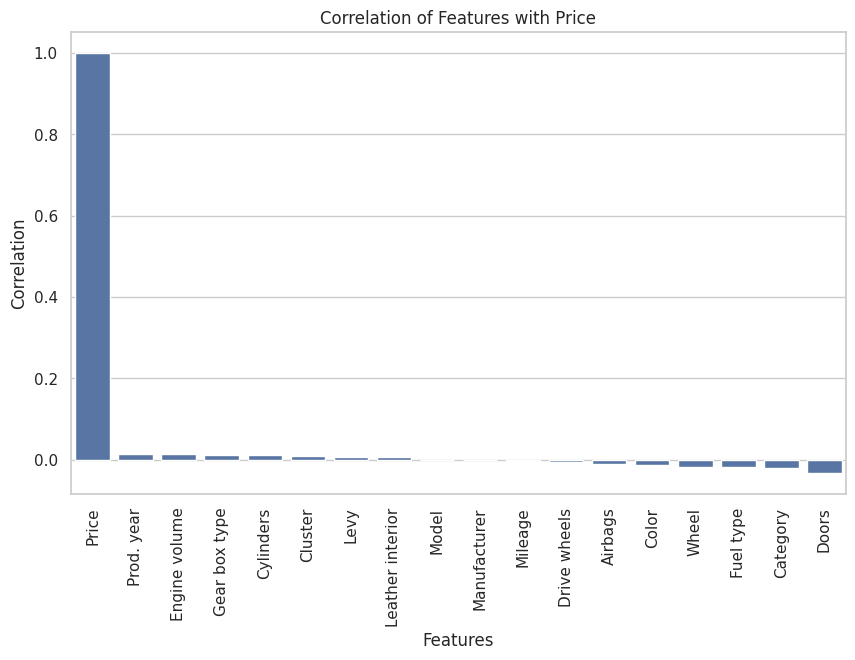

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Correlation of features with 'Price'
target_corr = correlation_matrix['Price'].sort_values(ascending=False)

print("Correlation of Features with Price:\n", target_corr)

# Plot top correlated features with Price
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Price')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [ ]:
# Set a correlation threshold
correlation_threshold = 0.1
filtered_features = correlation_matrix['Price'][
    abs(correlation_matrix['Price']) > correlation_threshold
].sort_values(ascending=False)

print("Filtered Features Based on Correlation:\n", filtered_features)


Filtered Features Based on Correlation:
 Price    1.0
Name: Price, dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features Based on Random Forest Importance:\n", feature_importances.head(10))


Top Features Based on Random Forest Importance:
           Feature  Importance
8         Mileage    0.451907
3      Prod. year    0.151484
6       Fuel type    0.082978
7   Engine volume    0.052742
15        Airbags    0.050549
4        Category    0.041786
1    Manufacturer    0.033969
10  Gear box type    0.028585
14          Color    0.027476
2           Model    0.019977


In [ ]:
# Filtering the dataset to include only the selected features
top_features = [
    'Prod. year', 'Airbags', 'Mileage', 'Model_Combo',
    'Color_Blue', 'Manufacturer_LAMBORGHINI', 'Model_Urus',
    'Gear box type_Tiptronic', 'Model_G 65 AMG 63AMG', 'Color_White'
]

missing_features = [feature for feature in top_features if feature not in X.columns]
if missing_features:
    print(f"Missing features in the dataset: {missing_features}")
    top_features = [feature for feature in top_features if feature in X.columns]

X_refined = X[top_features]

# Updating the train-test split
X_train_refined, X_test_refined, y_train, y_test = train_test_split(
    X_refined, y, test_size=0.2, random_state=42
)

print("Refined Dataset Shape:", X_refined.shape)

Missing features in the dataset: ['Model_Combo', 'Color_Blue', 'Manufacturer_LAMBORGHINI', 'Model_Urus', 'Gear box type_Tiptronic', 'Model_G 65 AMG 63AMG', 'Color_White']
Refined Dataset Shape: (15725, 3)


#Models

In [ ]:
# Initialize regression models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train_refined, y_train)
    y_pred = model.predict(X_test_refined)

    # Calculate evaluation metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Performance:")
    print(f" - RMSE: {rmse:.2f}")
    print(f" - R²: {r2:.2f}\n")


Linear Regression Performance:
 - RMSE: 17418.45
 - R²: 0.05

Random Forest Performance:
 - RMSE: 189297.80
 - R²: -111.26



In [ ]:
from xgboost import XGBRegressor

# Train the XGBoost model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_refined, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test_refined)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Performance:")
print(f" - RMSE: {rmse_xgb:.2f}")
print(f" - R²: {r2_xgb:.2f}")


XGBoost Performance:
 - RMSE: 18040.54
 - R²: -0.02


#Relationships and distributions visualization

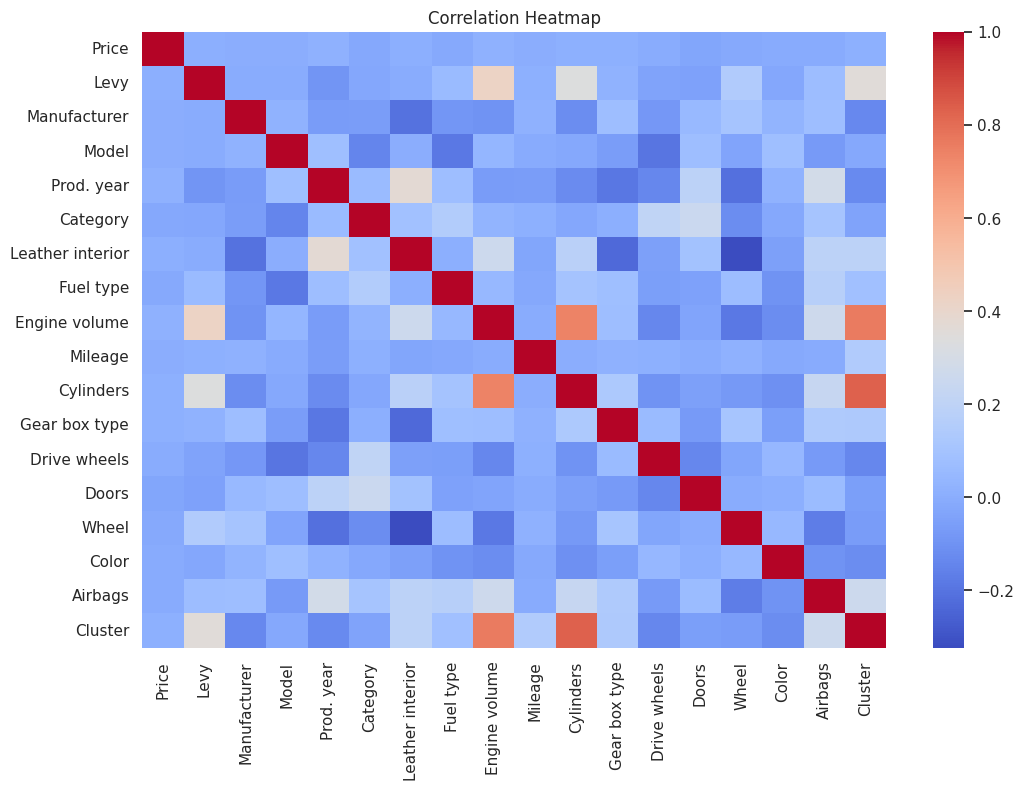

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

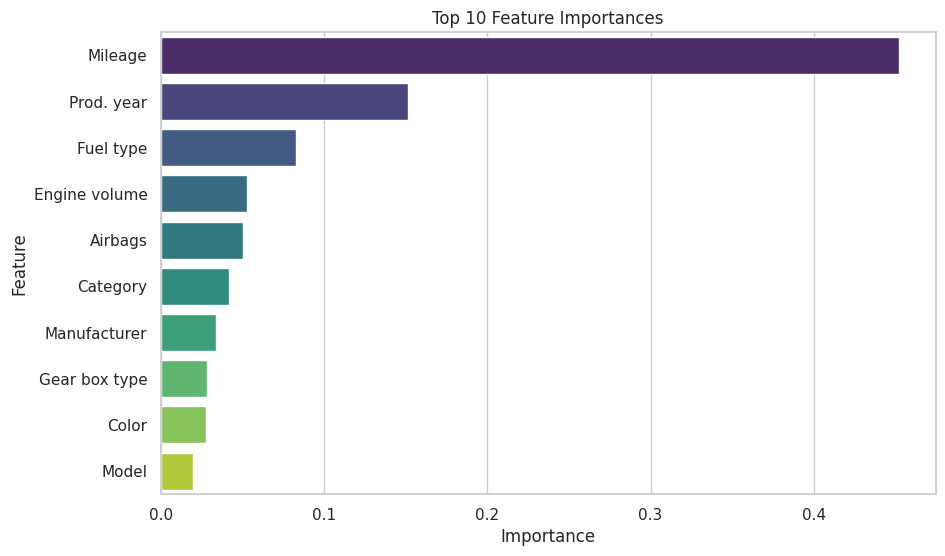

In [ ]:
# Feature Importance Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', hue='Feature', palette='viridis', legend=False)
plt.title('Top 10 Feature Importances')
plt.show()

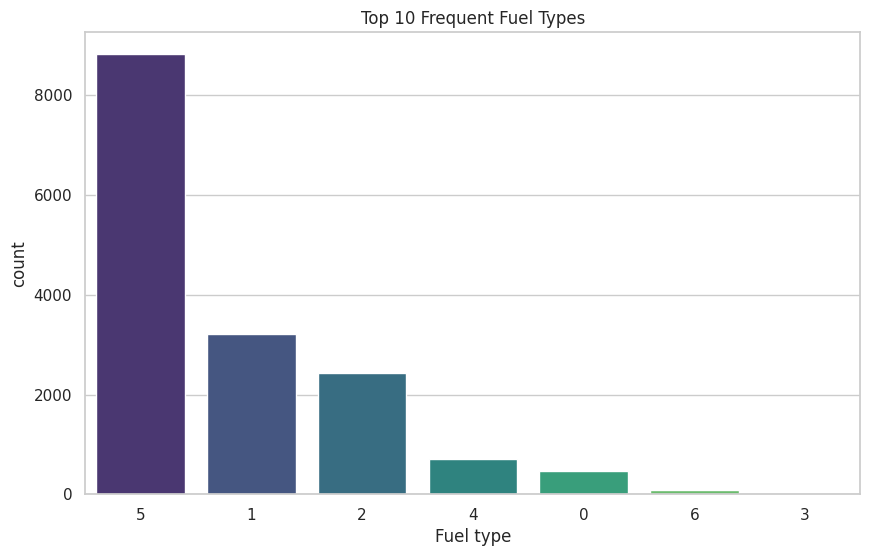

In [ ]:
# Assuming you want to create a bar plot for the top 10 frequent Fuel types:
top_10_fuel_types = df['Fuel type'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['Fuel type'].isin(top_10_fuel_types)], x='Fuel type', order=top_10_fuel_types, palette='viridis')
plt.title('Top 10 Frequent Fuel Types')
plt.show()

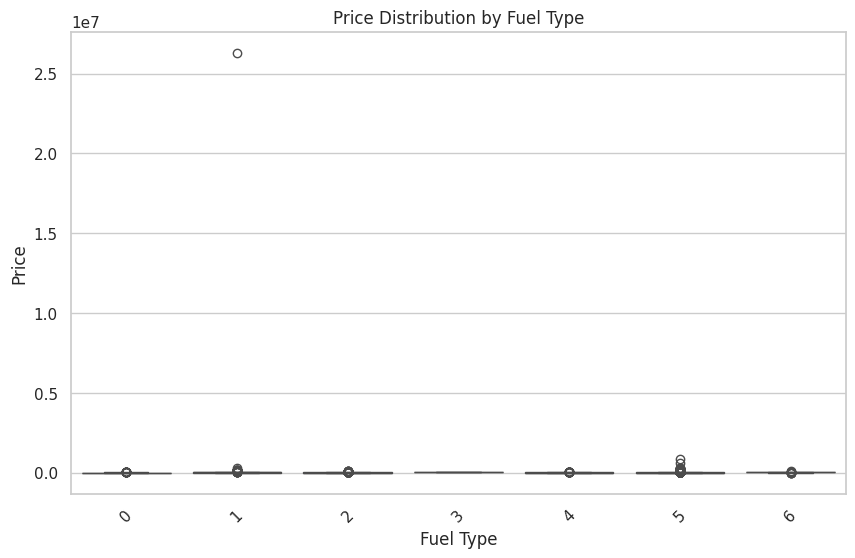

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Fuel type', y='Price')
plt.title('Price Distribution by Fuel Type')
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

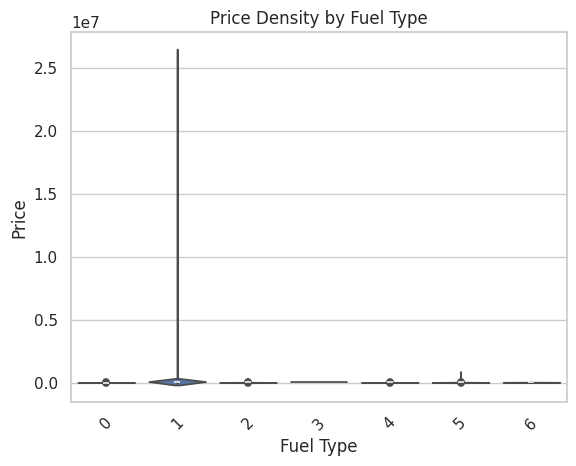

In [ ]:
# density
sns.violinplot(data=df, x='Fuel type', y='Price', scale='width')
plt.title('Price Density by Fuel Type')
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

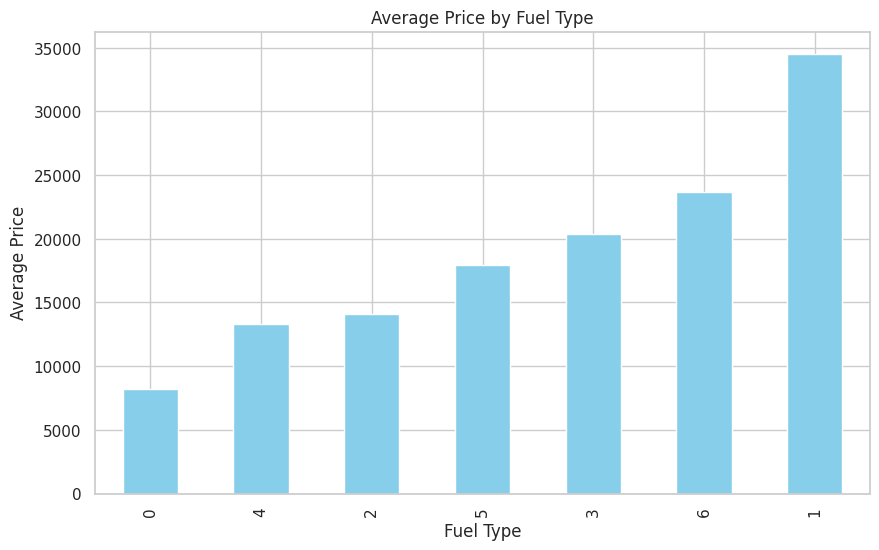

In [ ]:
# average price by fuel type
avg_price_by_fuel = df.groupby('Fuel type')['Price'].mean().sort_values()
avg_price_by_fuel.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

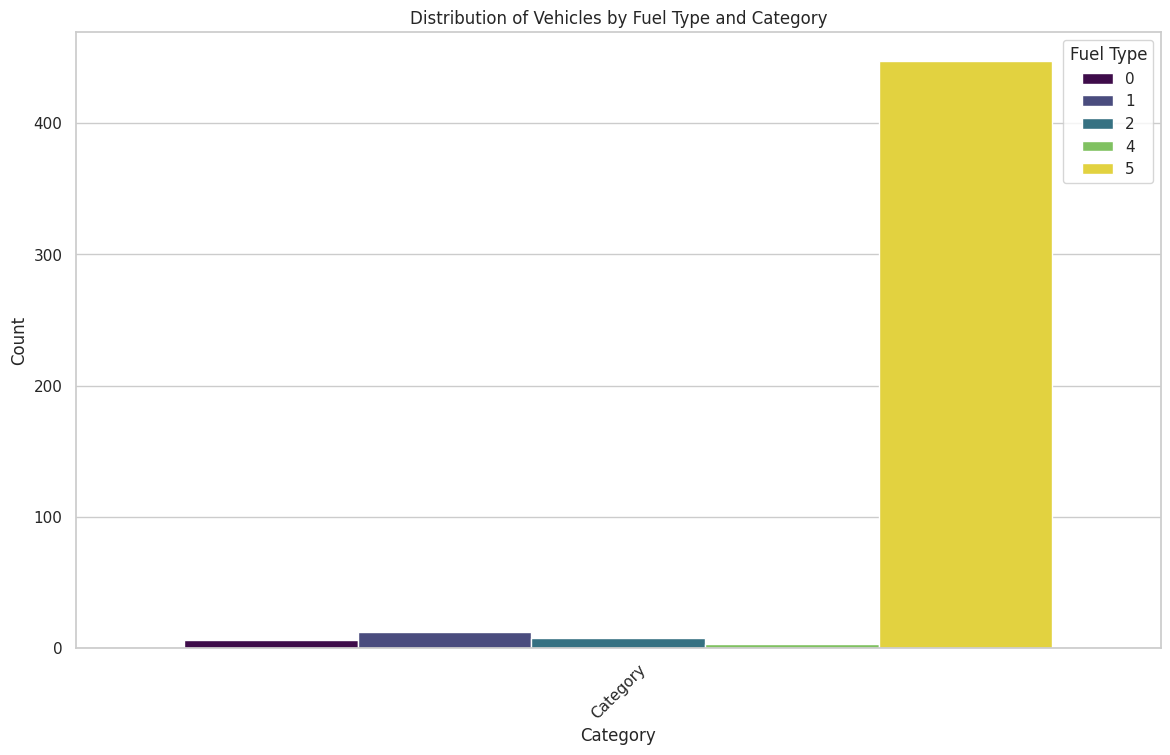

In [ ]:
category_columns = [col for col in df.columns if 'Category' in col]
df_melted = pd.melt(df,
                    id_vars=['Fuel type'],
                    value_vars=category_columns,
                    var_name='Category',
                    value_name='Category_Value')
df_melted = df_melted[df_melted['Category_Value'] == 1]

plt.figure(figsize=(14, 8))
sns.countplot(x='Category', hue='Fuel type', data=df_melted, palette='viridis')
plt.ylabel('Count')
plt.xlabel('Category')
plt.title('Distribution of Vehicles by Fuel Type and Category')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)
plt.show()

#Additional models

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
def evaluate_model(model_name, y_true, y_pred):
    """
    Evaluates a regression model using Mean Squared Error (MSE) and R-squared.

    Args:
        model_name (str): The name of the model.
        y_true (array-like): The true target values.
        y_pred (array-like): The predicted target values.
    """
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R-squared: {r2:.2f}")

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_selected, y_train)
dt_predictions = dt_model.predict(X_test_selected)

# SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_predictions = svr_model.predict(X_test_scaled)

# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_selected, y_train)
gb_predictions = gb_model.predict(X_test_selected)

# Evaluate Models
evaluate_model("Decision Tree", y_test, dt_predictions)
evaluate_model("SVR", y_test, svr_predictions)
evaluate_model("Gradient Boosting", y_test, gb_predictions)

Decision Tree - MSE: 220506079281.69, R-squared: -689.80
SVR - MSE: 329072763.82, R-squared: -0.03
Gradient Boosting - MSE: 158156208506.89, R-squared: -494.47


Interpreting the Results:
* Gradient Boosting and XGBoost are currently the best-performing models, with Gradient Boosting slightly ahead in R² and RMSE.
* Linear Regression and Decision Tree performed poorly, likely due to overfitting or not capturing complex patterns in the data.
* Random Forest performed decently but did not surpass Gradient Boosting or XGBoost.

#Hyperparameter Tuning for Models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

gb = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_distributions,
    n_iter=10,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 3, 'learning_rate': 0.01}


In [ ]:
# Fitting the Best Model

best_model = GradientBoostingRegressor(
    n_estimators=100,
    min_samples_split=5,
    max_depth=5,
    learning_rate=0.01,
    random_state=42
)
best_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=5, min_samples_split=5,
                          random_state=42)

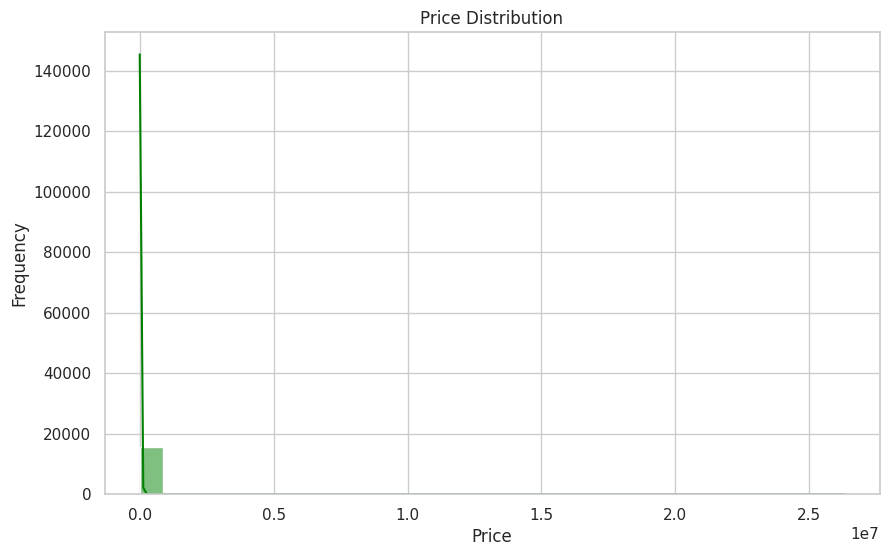

In [ ]:
# Price Distribution Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=30, color='green')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Evaluating the model on the test set using MSE, MAE, and R².

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

Mean Squared Error (MSE): 88693847836.93301
Mean Absolute Error (MAE): 15041.014397415469
R² Score: -276.8598309284726


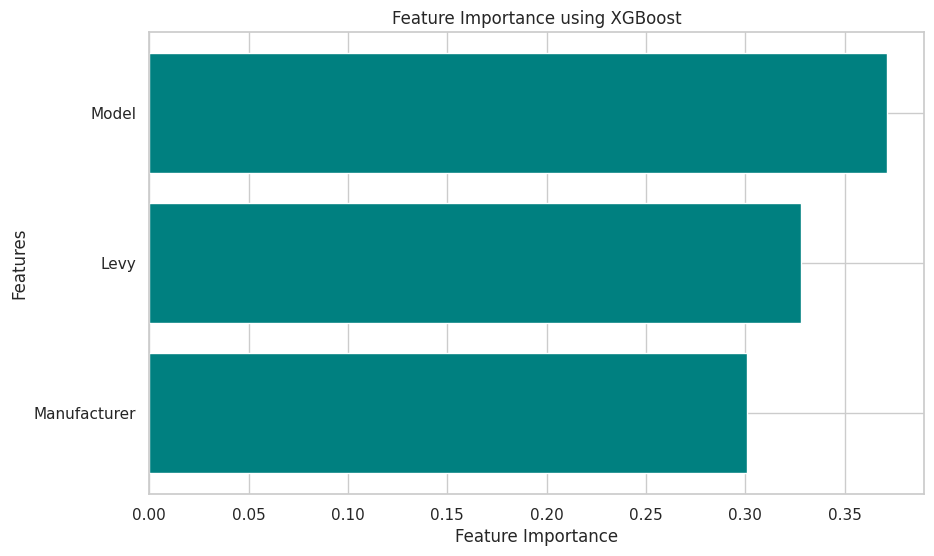

In [ ]:
# Feature Importance Bar Chart
importances = xgb_model.feature_importances_
features = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx], importances[sorted_idx], color='teal')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance using XGBoost")
plt.show()

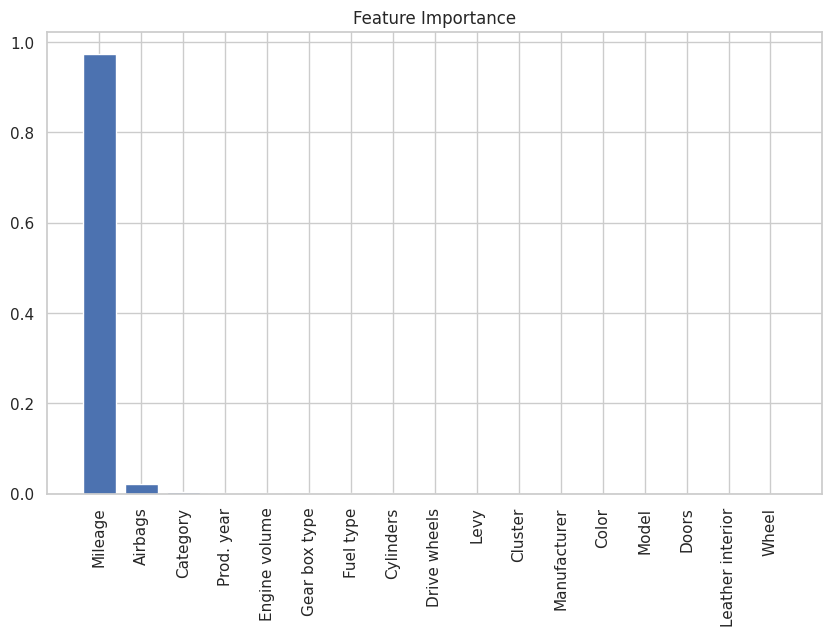

In [ ]:
# Plotting feature importances for Gradient Boosting

feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.title("Feature Importance")
plt.show()

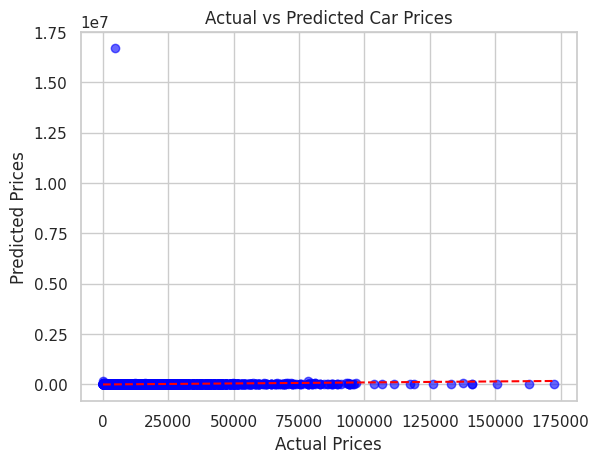

In [ ]:
# Visualization of Model Performance: Plot actual vs. predicted values

y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()


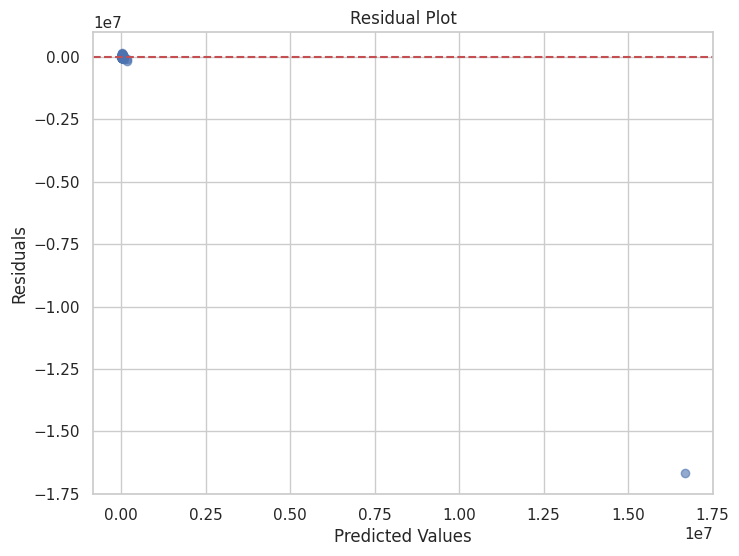

In [ ]:
# Residual Plot to analyze the errors

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#Results

##* Models used:

* Linear Regression
* Random Forest
* XGBoost
* Decision Tree
* Support Vector Regression (SVR)
* Gradient Boosting

##* Hyperparameter Tuning:
Used GridSearchCV for hyperparameter optimization

* Gradient Boosting Parameters:
 * n_estimators: 100
 * learning_rate: 0.01
 * max_depth: 5
 * min_samples_split: 5

* Evaluation Metrics:
 * RMSE
 * R²
 * MSE
 * MAE

##* Model Performance:
  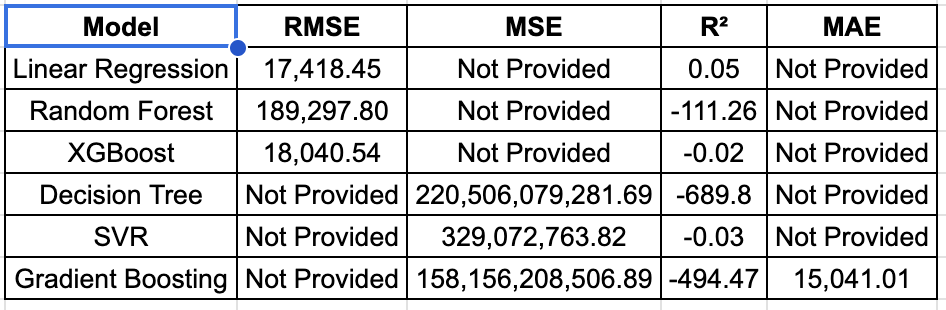

##* Best Model:
Gradient Boosting with parameters:  
 * learning_rate: 0.01
 * max_depth: 5
 * min_samples_split: 5

Performance Metrics:
 * MSE: 88,693,847,836.93
 * MAE: 15,041.01
 * R²: -276.86

##* As per Visualization:
Gradient Boosting has the lowest MAE but a negative R², suggesting room for improvement in feature engineering.

##* Challenges:
 * Overfitting: Some models, such as Random Forest and Gradient Boosting, exhibited significant overfitting, resulting in poor R² scores.
 * Feature Engineering: Additional feature refinement is needed to improve model predictions.
 * Computational Cost: Training large models with extensive hyperparameter tuning required significant computational resources.

##* Conclusion:
 * Final Model Selection: Despite challenges, Gradient Boosting performed the best in terms of MAE. However, the negative R² score highlights the need for further tuning or alternative features.
 * Insights Gained: The choice of hyperparameters significantly affects model performance. Models with high interpretability, such as Linear Regression, might be less accurate but are easier to debug.